<a href="https://colab.research.google.com/github/lcbjrrr/algojust/blob/main/NB03_statsMiss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- **Statistical Misinterpretation**: Misinterpreting results happens when conclusions don’t align with proper statistical analysis, leading to misleading findings. Common issues include assuming correlation means causation, cherry-picking data, or ignoring confounding factors. This can distort research outcomes and impact decision-making. Want to refine it further?


*The data used herein is for illustrative purposes only and does not reflect actual real-world data*

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/algojust/refs/heads/main/Covid%20-%20Cytokine.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PREmRNA             56 non-null     int64  
 1   POSTmRNA            56 non-null     int64  
 2   PlacebomRNA         56 non-null     int64  
 3   PREVector           56 non-null     int64  
 4   POSTVector          56 non-null     float64
 5   PlaceboVector       56 non-null     int64  
 6   PREProtein          56 non-null     int64  
 7   POSTProtein         56 non-null     int64  
 8   PlaceboProtein      56 non-null     int64  
 9   PREInactivated      56 non-null     int64  
 10  POSTInactivated     56 non-null     int64  
 11  PlaceboInactivated  56 non-null     int64  
 12  PreDNA              56 non-null     int64  
 13  PostDNA             56 non-null     int64  
 14  PlaceboDNA          56 non-null     int64  
dtypes: float64(1), int64(14)
memory usage: 6.7 KB


In [2]:
df.head()

,PREmRNA,POSTmRNA,PlacebomRNA,PREVector,POSTVector,PlaceboVector,PREProtein,POSTProtein,PlaceboProtein,PREInactivated,POSTInactivated,PlaceboInactivated,PreDNA,PostDNA,PlaceboDNA
0,40,660,0,40,330.0,0,40,220,0,22,88,0,5,11,0
1,40,150,1,40,75.0,1,40,50,1,33,99,1,11,11,1
2,10,30,1,10,15.0,1,10,10,1,22,88,1,22,22,1
3,20,60,1,20,30.0,1,20,20,1,11,111,1,6,5,1
4,11,45,0,11,22.5,0,11,15,0,22,122,0,7,12,0


#### Are any of the vaccines effective? Let's take the DNA based one as an initial exemple...

<BarContainer object of 2 artists>

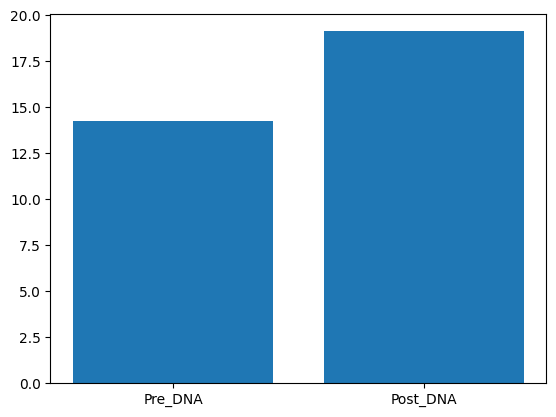

In [3]:
import matplotlib.pyplot as plt
df_non_placebo = df[ df['PlaceboDNA']==0 ]
avg_pre = df_non_placebo['PreDNA'].mean()
avg_post = df_non_placebo['PostDNA'].mean()
plt.bar(['Pre_DNA','Post_DNA'] , [avg_pre,avg_post])

#### How sure are you?

<BarContainer object of 2 artists>

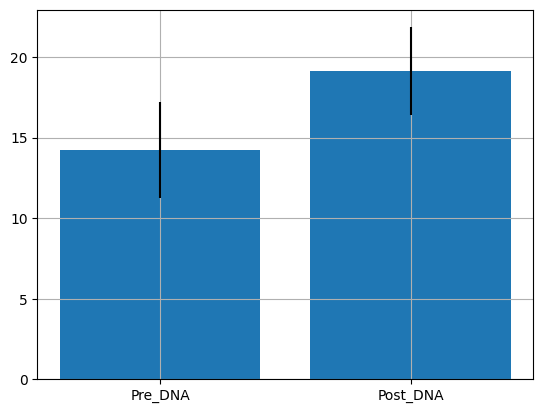

In [4]:
sem_pre = df_non_placebo['PreDNA'].sem()
sem_post = df_non_placebo['PostDNA'].sem()
plt.grid(True)
plt.bar(['Pre_DNA','Post_DNA'] , [avg_pre,avg_post], yerr=[sem_pre*1.96,sem_post*1.96])
#CI for conf 95% or sig of 5%

#### Let's take another vaccine then, how about Inactivated virus based one?

18.731411685730638 21.25 23.768588314269362
102.69047315305988 109.0 115.30952684694012


<BarContainer object of 2 artists>

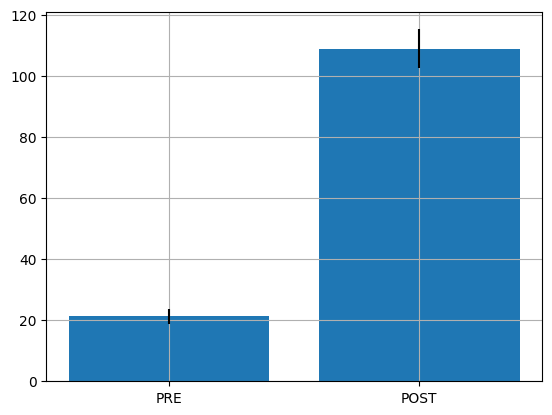

In [5]:
df_non_placebo = df[ df['PlaceboInactivated']==0 ]
avg_pre = df_non_placebo['PREInactivated'].mean()
avg_post = df_non_placebo['POSTInactivated'].mean()
sem_pre = df_non_placebo['PREInactivated'].sem()
sem_post = df_non_placebo['POSTInactivated'].sem()
print(avg_pre-sem_pre*1.96,avg_pre, avg_pre+ sem_pre*1.96)
print(avg_post-sem_post*1.96,avg_post,avg_post+sem_post*1.96)
plt.grid(True)
plt.bar(['PRE','POST'] , [avg_pre,avg_post], yerr=[sem_pre*1.96,sem_post*1.96])

#### Make sure to compare your results um a control group, for intance, people that took placebo.

102.69047315305988 109.0 115.30952684694012
95.90021659266698 99.5 103.09978340733302


<BarContainer object of 2 artists>

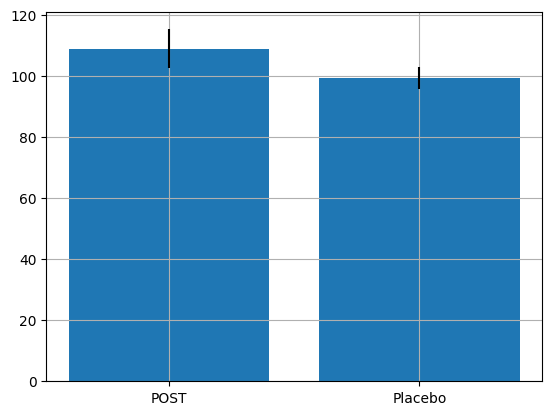

In [6]:
df_placebo = df[ df['PlaceboInactivated']==1 ]
avg_pla = df_placebo['POSTInactivated'].mean()
sem_pla = df_placebo['POSTInactivated'].sem()
print(avg_post-sem_post*1.96,avg_post,avg_post+sem_post*1.96)
print(avg_pla-sem_pla*1.96,avg_pla, avg_pla+ sem_pla*1.96)
plt.grid(True)
plt.bar(['POST','Placebo'] , [avg_post,avg_pla], yerr=[sem_post*1.96,sem_pla*1.96])

#### Let's check on the RNA based one:

<BarContainer object of 2 artists>

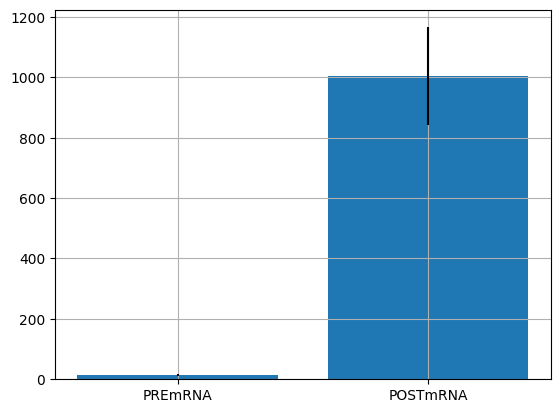

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.grid(True)
df_non_placebo = df[df['PlacebomRNA'] == 0].copy()
avg_prem = df_non_placebo['PREmRNA'].mean()
avg_postm = df_non_placebo['POSTmRNA'].mean()
sem_prem = df_non_placebo['PREmRNA'].sem()
sem_postm = df_non_placebo['POSTmRNA'].sem()
plt.bar(['PREmRNA', 'POSTmRNA'], [avg_prem, avg_postm], yerr=[sem_prem*1.96,sem_postm*1.96])

<BarContainer object of 2 artists>

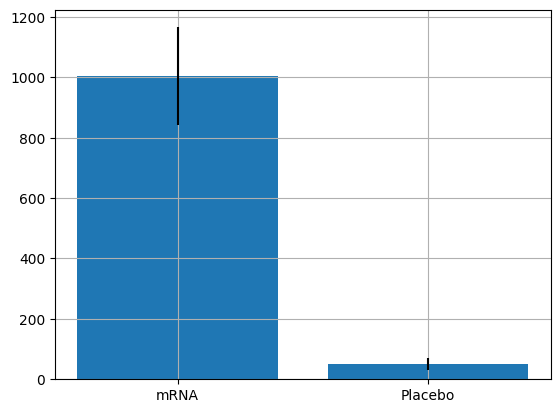

In [ ]:
df_placebo = df[df['PlacebomRNA'] == 1].copy()
avg_placebo = df_placebo['POSTmRNA'].mean()
sem_placebo = df_placebo['POSTmRNA'].sem()
plt.grid(True)
plt.bar(['mRNA', 'Placebo'],[avg_postm,avg_placebo], yerr=[sem_postm*1.96, sem_placebo*1.96])

#### Are any of the vaccines "more efficient" than the others? Meaning, is there a statistically significant relationship between two categorical variables by comparing observed frequencies to expected frequencies?

# Chi-Squared test

The **Chi-Squared test** (often written as χ2 test) is a statistical hypothesis test that is widely used in the analysis of categorical data. It helps determine if there is a significant association between two categorical variables or if the observed frequency distribution of a single categorical variable differs from an expected frequency distribution.

|          | Immune | Not |
|----------|------|------|
| mRNA | 25   | 5    |
| DNA  | 5    | 10   |



In [ ]:
import numpy as np
from scipy.stats import chisquare
data = np.array([[25, 5],
                 [5, 10]])
mRNA = data[0,:].sum()
DNA = data[1,:].sum()
immune = data[:,0].sum()
not_immune = data[:,1].sum()
total = data.sum()
print(mRNA,DNA,immune,not_immune,total)


30 15 30 15 45



|          | Immune | Not | Total |
|----------|------|------|-------|
| mRNA | 25   | 5    | **30**    |
| DNA  | 5    | 10   | **15**    |
| **Total**    | **30**   | **15**   | **45**    |



$$T \times P(mRNA) \times P(imu) = total \times \left( \frac{mRNA}{total} \right) \left( \frac{immune}{total}\right).
$$



|          | **.................Immune.................** | **.............Not Immune.............** |
|----------|------|------|
| **mRNA** | $T \times P(mRNA) \times P(imu)$    | $T \times P(mRNA) \times  P(not)$    |
| **DNA**  | $T \times P(DNA) \times P(imu)$    | $T \times P(DNA) \times P(not)$     |

In [ ]:
expected = np.array([[total*(mRNA/total)*(immune/total), total*(mRNA/total)*(not_immune/total)],
                   [total*(DNA/total)*(immune/total), total*(DNA/total)*(not_immune/total)]])
print(expected)
stat, p_value = chisquare(data.flatten(), f_exp=expected.flatten())

alpha = 0.05
print(stat)
print(p_value)

#Conclusion: Highly Significant Association: The p-value (~0.0008) is much less than 0.05, indicating a very strong statistical association between...

[[20. 10.]
 [10.  5.]]
11.25
0.010448064558680668


## Activity: Statistical Misinterpretation


**Problem**

Statistical misinterpretation can severely distort research and decision-making by leading to misleading findings. In this sense, find a dataset on Kaggle that enables the comparison of at least two distinct groups. Ideally, your chosen dataset will include a control group. Then:

- Group Comparison: Select a quantitative aspect within the dataset. Compare the overall results of your two chosen groups based on this aspect, identifying a primary difference.

- Statistical Significance: Perform an appropriate statistical test to validate if this identified difference between your two groups is statistically significant, using the confidence interval concept. If a control group exists, extend your analysis to compare each primary group against it.

- Frequency Analysis & Chi-Square: Identify a categorical variable. Compare the frequency of results for this variable between your two primary groups and validate any observed differences using a Chi-Square test.

**Conclusions**

Based on your analyses, clearly articulate your conclusions regarding the statistical significance of your findings for both the group comparisons and the frequency analysis. Discuss what these findings imply in the context of the dataset and the potential for misinterpretation.